In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

In [26]:
torch.cuda.is_available()

True

In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [88]:
import torch
from torchvision import datasets, transforms

In [89]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [90]:
# Download and load the training data
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# Download and load the test data
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

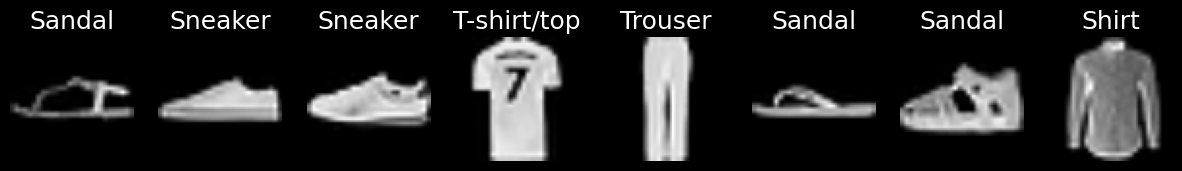

In [91]:


# Define the class labels for Fashion MNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
images, labels = next(iter(train_loader))

# Display the sample images
fig, axes = plt.subplots(1, 8, figsize=(15, 3))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(classes[labels[i].item()])
    axes[i].axis('off')
plt.show()

In [92]:
# Create an ANN Model and test this dataset.
import torch.nn.functional as F

class NN_Classifier(nn.Module):
    def __init__(self):
      super(NN_Classifier, self).__init__()
      self.flatten = nn.Flatten()
      self.input = nn.Linear(64 * 64, 2048)
      self.bnorm1 = nn.BatchNorm1d(2048)
      self.dropout1 = nn.Dropout(0.3)
      self.fc1 = nn.Linear(2048, 1024)
      self.bnorm2 = nn.BatchNorm1d(1024)
      self.dropout2 = nn.Dropout(0.2)
      self.fc2 = nn.Linear(1024, 512)
      self.bnorm3 = nn.BatchNorm1d(512)
      self.dropout3 = nn.Dropout(0.1)
      self.fc3 = nn.Linear(512, 256)
      self.bnorm4 = nn.BatchNorm1d(256)
      self.fc4 = nn.Linear(256, 128)
      self.bnorm5 = nn.BatchNorm1d(128)
      self.fc5 = nn.Linear(128, 64)
      self.bnorm6 = nn.BatchNorm1d(64)
      self.fc6 = nn.Linear(64, 32)
      self.bnorm7 = nn.BatchNorm1d(32)
      self.fc7 = nn.Linear(32, 10)


    def forward(self, x):
      x = self.flatten(x)
      x = self.input(x)
      x = self.bnorm1(x)
      x = F.relu(x)
      x = self.dropout1(x)
      x = self.fc1(x)
      x = self.bnorm2(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)
      x = self.bnorm3(x)
      x = F.relu(x)
      x = self.dropout3(x)
      x = self.fc3(x)
      x = self.bnorm4(x)
      x = F.relu(x)
      x = self.fc4(x)
      x = self.bnorm5(x)
      x = F.relu(x)
      x = self.fc5(x)
      x = self.bnorm6(x)
      x = F.relu(x)
      x = self.fc6(x)
      x = self.bnorm7(x)
      x = F.relu(x)
      x = self.fc7(x)

      return x


In [93]:
model = NN_Classifier()

In [94]:
# Define the loss function and optimizer
lossfunc = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.SGD(model.parameters(), momentum = 0.9, lr = 0.001)

model.to(device) # placing a model on GPU

#training Loop
epochs = 101

losses    = torch.zeros(epochs)
trainAcc  = []
testAcc   = []

# For Loop for epochs

for epoch in range(epochs):
 model.train()

 # Loop for training in batches

 batchAcc  = []
 batchLoss = []

 for X,y in train_loader:

  X = X.to(device) # Placing features on device
  y = y.to(device) # placing labels on device

  ypred = model(X)
  loss = lossfunc(ypred,y)

# Backpropagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Append batchloss

  batchLoss.append(loss.item())

  ypred = ypred.cpu() # Back to cpu
  y = y.cpu()

  # compute batch accuracy

  acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
  batchAcc.append(acc)

# Batch loop concluded

# Average training accuracy (Outside the batchloop)

 trainAcc.append(np.mean(batchAcc))

# Losses through epochs

 losses[epoch] = np.mean(batchLoss)

# TESTING the model

 model.eval()
 X,y = next(iter(test_loader))
 X = X.to(device)
 y = y.to(device)

 with torch.no_grad(): #This step  Deactivating autogradient
  ypred = model(X)
  ypred = ypred.cpu()
  y = y.cpu()

 # Appending test accuracy

  testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))
  print(f' epochs : {epoch}  loss : {loss : 2.2f}, train_acc : {trainAcc[-1]:.2f}, test_acc : {testAcc[-1]:.2f}')


 epochs : 0  loss :  0.50, train_acc : 77.86, test_acc : 81.25
 epochs : 1  loss :  0.30, train_acc : 83.57, test_acc : 87.50
 epochs : 2  loss :  0.21, train_acc : 85.07, test_acc : 78.12
 epochs : 3  loss :  0.38, train_acc : 86.24, test_acc : 87.50
 epochs : 4  loss :  0.34, train_acc : 86.87, test_acc : 81.25
 epochs : 5  loss :  0.26, train_acc : 87.29, test_acc : 87.50
 epochs : 6  loss :  0.71, train_acc : 87.86, test_acc : 81.25
 epochs : 7  loss :  0.35, train_acc : 88.23, test_acc : 87.50
 epochs : 8  loss :  0.21, train_acc : 88.49, test_acc : 90.62
 epochs : 9  loss :  0.52, train_acc : 88.96, test_acc : 90.62
 epochs : 10  loss :  0.44, train_acc : 89.18, test_acc : 87.50
 epochs : 11  loss :  0.34, train_acc : 89.46, test_acc : 87.50
 epochs : 12  loss :  0.17, train_acc : 89.49, test_acc : 87.50
 epochs : 13  loss :  0.14, train_acc : 89.92, test_acc : 87.50
 epochs : 14  loss :  0.34, train_acc : 89.99, test_acc : 90.62
 epochs : 15  loss :  0.36, train_acc : 90.39, tes

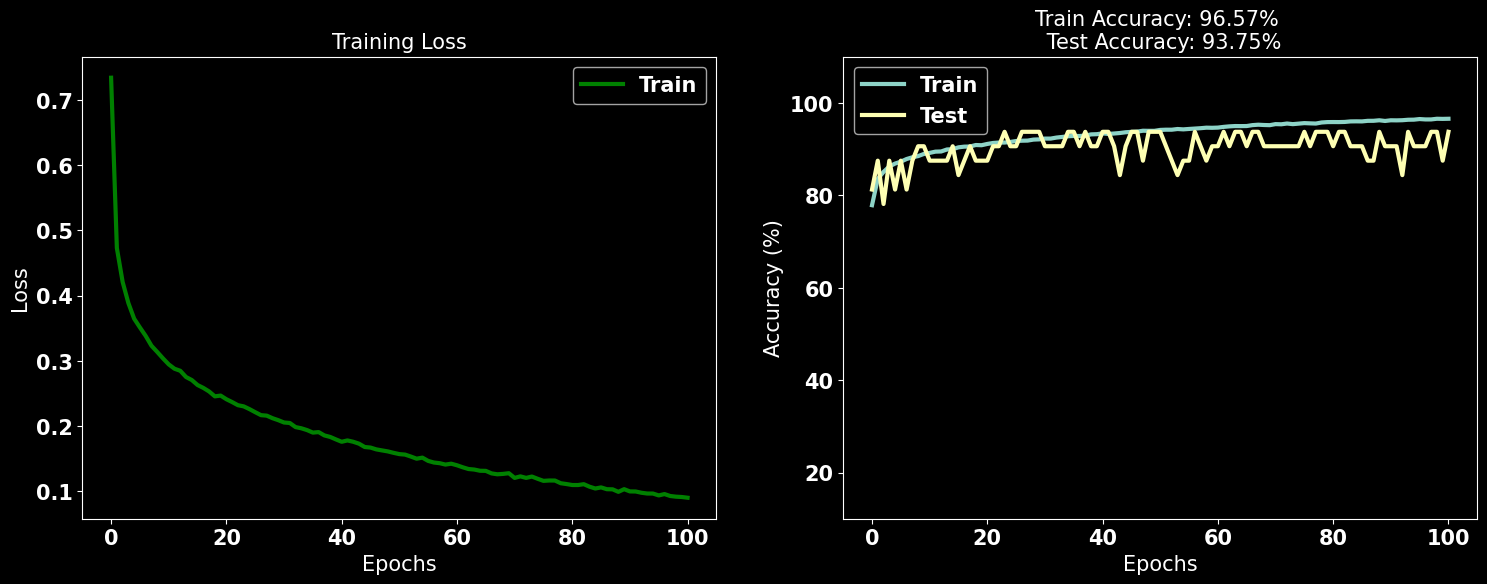

In [95]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses, 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

In [96]:
ypred = np.argmax(ypred, axis = 1)

In [97]:
# Create Confusion Matrix

from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [98]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

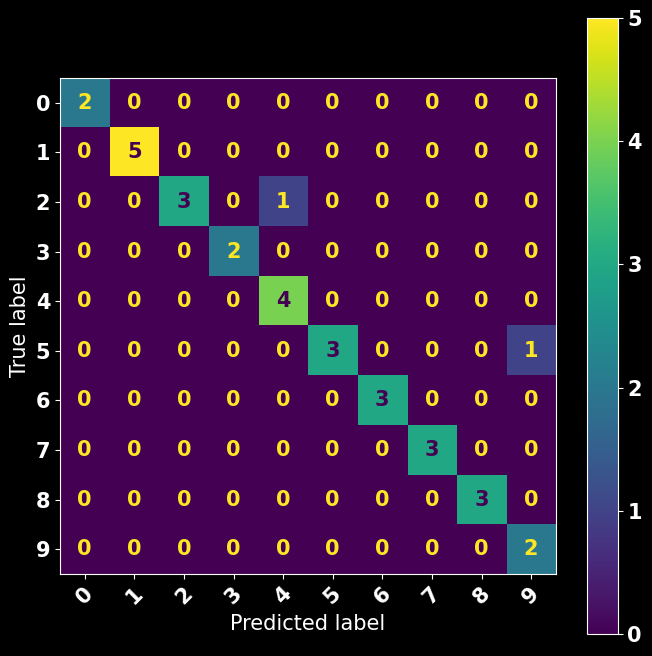

In [99]:
cm = confusion_matrix(ypred, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1,2,3,4,5,6,7,8,9])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure() 
fig.set_figwidth(8)
fig.set_figheight(8) 
plt.show()

In [100]:
# Print Classification Report

from sklearn.metrics import classification_report
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         2
           4       1.00      0.80      0.89         5
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3

    accuracy                           0.94        32
   macro avg       0.95      0.95      0.94        32
weighted avg       0.95      0.94      0.94        32

